# Pré-Processamento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_clean.csv")

In [3]:
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preco
0,1,2023-02-24,B,Eletronicos,4,463.97
1,2,2023-06-30,E,Eletronicos,4,265.23
2,3,2023-05-28,C,Roupas,4,468.94
3,4,2023-02-24,E,Eletronicos,5,335.57
4,5,2023-02-12,B,Moveis,2,215.21


In [4]:
# Para fins de análise, também vou adicionar a coluna de total de vendas neste notebook
Total_Vendas = []

for i in range(len(df['ID'])):
  tot = df['Quantidade'][i] * df['Preco'][i]
  Total_Vendas.append(tot)

df['Total_Vendas'] = Total_Vendas

In [5]:
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preco,Total_Vendas
0,1,2023-02-24,B,Eletronicos,4,463.97,1855.88
1,2,2023-06-30,E,Eletronicos,4,265.23,1060.92
2,3,2023-05-28,C,Roupas,4,468.94,1875.76
3,4,2023-02-24,E,Eletronicos,5,335.57,1677.85
4,5,2023-02-12,B,Moveis,2,215.21,430.42


# Gráficos

### Visualização Mensal

In [6]:
# Filtrando os meses das vendas
df["Mes"] = pd.to_datetime(df['Data']).dt.to_period("M")
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preco,Total_Vendas,Mes
0,1,2023-02-24,B,Eletronicos,4,463.97,1855.88,2023-02
1,2,2023-06-30,E,Eletronicos,4,265.23,1060.92,2023-06
2,3,2023-05-28,C,Roupas,4,468.94,1875.76,2023-05
3,4,2023-02-24,E,Eletronicos,5,335.57,1677.85,2023-02
4,5,2023-02-12,B,Moveis,2,215.21,430.42,2023-02


In [7]:
# Vendas mensais
vendas_mes = df.groupby("Mes")["Total_Vendas"].sum().reset_index()
vendas_mes

,Mes,Total_Vendas
0,2023-01,21466.53
1,2023-02,24970.93
2,2023-03,24877.76
3,2023-04,23603.42
4,2023-05,19233.32
5,2023-06,19113.96
6,2023-07,20959.70
7,2023-08,28118.83
8,2023-09,8165.47
9,2023-10,19273.86


In [8]:
# O matplotlib não lida muito bem com o formato `Period` de data, precisamos converter para datetime
print(vendas_mes["Mes"].dtype)


period[M]


In [9]:
# Convertendo para datetime
vendas_mes['Mes'] = vendas_mes['Mes'].dt.to_timestamp()
print(vendas_mes["Mes"].dtype)

datetime64[ns]


<ipython-input-28-813270e96c01>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses = pd.date_range(start="2023-01-01", end="2023-12-31", freq="M")


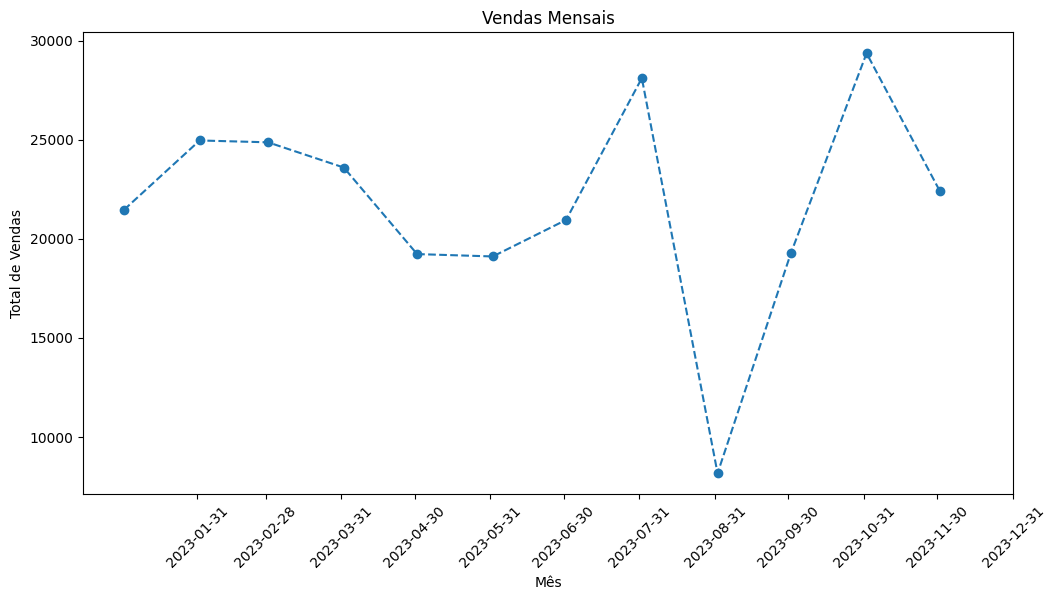

In [28]:
# Especificando os meses para que no gráfico apareça todos os meses do ano no eixo X
meses = pd.date_range(start="2023-01-01", end="2023-12-31", freq="M")

# Gráfico
plt.figure(figsize = (12,6))
plt.plot(vendas_mes['Mes'], vendas_mes['Total_Vendas'], linestyle = '--', marker = 'o')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(meses, rotation = 45)
plt.savefig("vendas_mensais.pdf", format="pdf", bbox_inches="tight")
plt.show()

Padrões:

1. Quedas nas vendas em setembro e recuperação em outubro: Setembro é o mês que apresenta o menor valor da série, seguido por uma rápida recuperação em outubro. O padrão observado pode ser explicado por alguns fatores: baixa demanda, ausência de campanhas promocionais eficazes em setembro e, em outubro, datas como o Dia das Crianças ou ações de marketing mais intensas/eficazes.

2. Nos primeiros sete meses do ano, as vendas oscilam entre R\$ 20.000 e R\$ 25.000, indicando um padrão estável nesse período.

Insights:

1. Para evitar novas quedas no mês de setembro, a empresa deve intensificar as campanhas promocionais e melhorar a divulgação dessas, especialmente em períodos de baixa demanda.
2. Analisar as estratégias aplicadas em agosto e novembro pode ajudar no aumento de vendas em setembro (ou em períodos de baixa demanda de forma geral), uma vez que esses meses foram os de maior faturamento.

### Categoria dos Produtos

In [15]:
# A loja tem quatro categorias de produtos
df['Categoria'].value_counts()

,count
Categoria,
Roupas,72
Perfumaria,63
Eletronicos,58
Moveis,57


In [17]:
# Obtendo o total de vendas para cada categoria por mês
categorias_mes = df.groupby(["Mes", "Categoria"])["Total_Vendas"].sum().unstack()
categorias_mes

Categoria,Eletronicos,Moveis,Perfumaria,Roupas
Mes,,,,
2023-01,6411.89,2757.87,7088.06,5208.71
2023-02,6804.51,10310.21,5848.67,2007.54
2023-03,3804.07,5115.06,8271.31,7687.32
2023-04,8707.22,6811.32,2115.52,5969.36
2023-05,2014.35,8112.11,2065.52,7041.34
2023-06,4105.71,1758.64,8613.34,4636.27
2023-07,5603.57,5947.28,4189.90,5218.95
2023-08,6886.34,6039.06,8353.11,6840.32
2023-09,3692.95,566.33,1196.75,2709.44


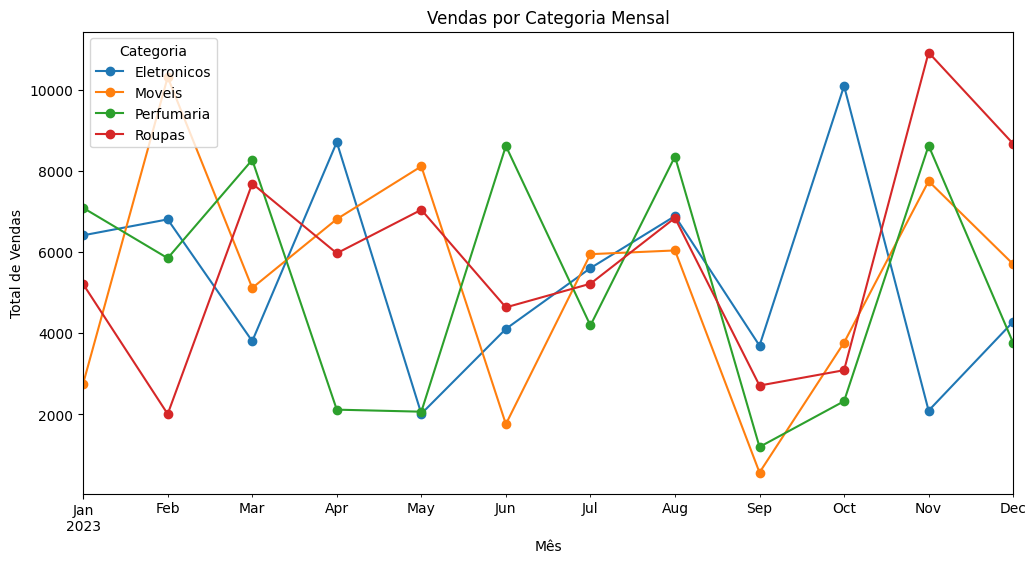

In [27]:
plt.figure(figsize = (12,6))
categorias_mes.plot(kind="line", marker = "o", ax = plt.gca())
plt.title('Vendas por Categoria Mensal')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.savefig("vendas_categoria_geral.pdf", format="pdf", bbox_inches="tight")
plt.show()

A queda no faturamento em setembro afeta todas as categorias; A categoria dos eletrônicos lidera a recuperação em outubro. Isso indica que essa categoria pode ser mais sensível a promoções ou sazonalidades. Nesse caso, a recomendação seria aplicar as campanhas de outubro no mês de setembro (do próximo ano).

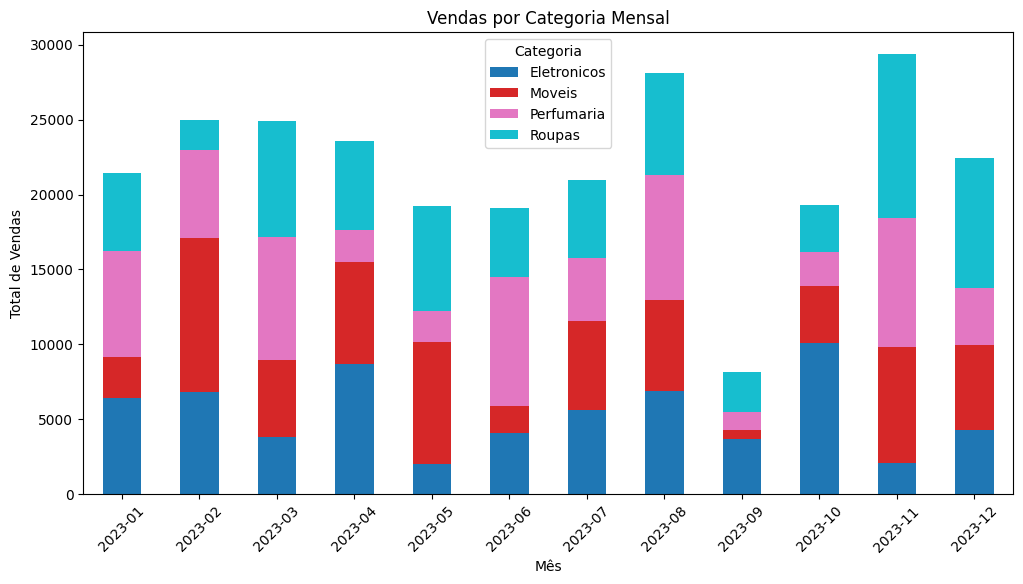

In [26]:
# O gráfico de linha do total de vendas por categoria é interessante para investigar padrões mas pode ser muita informação de uma só vez

categorias_mes.plot(kind = "bar", stacked = True, figsize = (12,6), cmap = "tab10")
plt.title('Vendas por Categoria Mensal')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(ticks=range(len(categorias_mes.index)), labels=categorias_mes.index.astype(str), rotation=45)
plt.savefig("vendas_categoria_mensal.pdf", format="pdf", bbox_inches="tight")
plt.show()

O gráfico de barras empilhadas mostra o quanto cada categoria de produto contribui para o total de vendas em cada mês. Roupas lidera em novembro e dezembro, enquanto setembro registra o menor faturamento geral. As categorias de eletrônicos e perfumaria mantêm vendas mais consistentes, enquanto móveis apresenta maior oscilação.